# Zomato Restaurants Data

Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. Data has been collected from the Zomato API in the form of .json files(raw data).The target of the zomato restaurant dataset is Aggregate Rating.We need to predict the aggregate rating based on different features.

[Zomato Restaurant Data](https://www.kaggle.com/shrutimehta/zomato-restaurants-data)

 Importing the libraries


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline


## Data Preprocessing

Loading the dataset

In [10]:
df = pd.read_csv("zomato.csv",encoding='ISO-8859-1')

In [11]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Keys of the zomato restaurant

In [12]:
df.keys()

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## Feature Engineering

### Multilabel Binarizer
Converting the multivalues in the data to the matrix format

In [101]:
from sklearn.preprocessing import MultiLabelBinarizer

In [15]:
mlb = MultiLabelBinarizer()

In [16]:
 new_cuisine=pd.DataFrame(mlb.fit_transform(df['Cuisines'].astype(str)))

In [17]:
new_cuisine.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1,1,0,0,0,0,1,0,1,0,...,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [18]:
 restaurant_name=pd.DataFrame(mlb.fit_transform(df['Restaurant Name'].astype(str)))

In [19]:
new_city=pd.DataFrame(mlb.fit_transform(df['City'].astype(str)))

In [20]:
new_address=pd.DataFrame(mlb.fit_transform(df['Address'].astype(str)))

In [21]:
new_locality=pd.DataFrame(mlb.fit_transform(df['Locality'].astype(str)))

In [22]:
locality_verbose=pd.DataFrame(mlb.fit_transform(df['Locality Verbose'].astype(str)))

In [23]:
df['new cost'] = 0

Coverting all various currencies into dollar

In [24]:
d = {'Botswana Pula(P)':0.095, 'Brazilian Real(R$)':0.266,'Dollar($)':1,'Emirati Diram(AED)':0.272,
    'Indian Rupees(Rs.)':0.014,'Indonesian Rupiah(IDR)':0.00007,'NewZealand($)':0.688,'Pounds(\x8c£)':1.314,
    'Qatari Rial(QR)':0.274,'Rand(R)':0.072,'Sri Lankan Rupee(LKR)':0.0055,'Turkish Lira(TL)':0.188}

df['new cost'] = df['Average Cost for two'] * df['Currency'].map(d)

In [25]:
df['cuisine'] = 0

### Principle Component Analysis
PCA is used to reduce larger dimension columns into specified columns without losing the contents

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca=PCA()

Here I am converting the cuisine,restaurant,city,address,locality,locality_verbose into single column 

In [28]:
cuisine = pca.fit_transform(new_cuisine)
pca = PCA(n_components=1)  
cuisine = pca.fit_transform(cuisine)
df['cuisine']=cuisine

In [29]:
df['cuisine'].head()

0    0.705835
1    1.787682
2    0.014785
3    0.610066
4    0.877396
Name: cuisine, dtype: float64

In [30]:
restaurant = pca.fit_transform(restaurant_name)
pca = PCA(n_components=1)  
restaurant = pca.fit_transform(restaurant)
df['restaurant']=restaurant

In [31]:
city = pca.fit_transform(new_city)
pca = PCA(n_components=1)  
city = pca.fit_transform(city)
df['city']=city

In [32]:
address = pca.fit_transform(new_address)
pca = PCA(n_components=1)  
address = pca.fit_transform(address)
df['address']=address

In [33]:
locality = pca.fit_transform(new_locality)
pca = PCA(n_components=1)  
locality = pca.fit_transform(locality)
df['locality']=locality

In [34]:
locality_verbose = pca.fit_transform(locality_verbose)
pca = PCA(n_components=1)  
locality_verbose = pca.fit_transform(locality_verbose)
df['locality_verbose']=locality_verbose

In [35]:
cuisine.shape

(9551, 1)

### Label Encoder
Converting the single categorical values in the dataset into numerical values

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


Here i am converting Has table booking, Has online delivery, Is delivering now, Rating text, City, Rating Color, Switch to order menu to equivalent integer values

In [37]:
df['Has Table booking'] = labelencoder.fit_transform(df['Has Table booking'])

In [38]:
df['Has Online delivery'] = labelencoder.fit_transform(df['Has Online delivery'])

In [39]:
df['Is delivering now'] = labelencoder.fit_transform(df['Is delivering now'])

In [40]:
df['Rating text']= labelencoder.fit_transform(df['Rating text'])

In [41]:
df['Rating text'].head()

0    1
1    1
2    5
3    1
4    1
Name: Rating text, dtype: int32

In [42]:
df['City'] = labelencoder.fit_transform(df['City'])

In [43]:
df['Rating color'] = labelencoder.fit_transform(df['Rating color'])

In [44]:
df['Switch to order menu'] = labelencoder.fit_transform(df['Switch to order menu'])

Renaming the column names

In [45]:

df.rename(columns = {"Aggregate rating":"Aggregate_rating", 
                    "Price range":"Price_range",
                    "Rating color":"Rating_color",
                      "Restaurant ID":"Restaurant_id",
                      "new cost":"new_cost",
                        "Rating text":"Rating_text"}, 
                                 inplace = True)

Dropping the few attributes which is already exits in the dataset

In [46]:
zomato=df.drop(['Restaurant Name','Cuisines','City','Address','Locality','Locality Verbose',
       'Average Cost for two', 'Currency'],axis=1)

### Updated Dataset
Converting all categorical values into numerical values 

In [47]:
zomato.head()

,Restaurant_id,Country Code,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,new_cost,cuisine,restaurant,city,address,locality,locality_verbose
0,6317637,162,121.027535,14.565443,1,0,0,0,3,4.8,0,1,314,104.5,0.705835,-0.002499,0.936396,0.616048,0.305656,1.031834
1,6304287,162,121.014101,14.553708,1,0,0,0,3,4.5,0,1,591,114.0,1.787682,-0.898503,0.936396,0.390346,-0.218017,0.527627
2,6300002,162,121.056831,14.581404,1,0,0,0,4,4.4,1,5,270,380.0,0.014785,1.142312,1.503840,0.801826,-0.377289,0.995238
3,6318506,162,121.056475,14.585318,0,0,0,0,4,4.9,0,1,365,142.5,0.610066,-1.614263,1.503840,0.662638,0.068886,1.237404
4,6314302,162,121.057508,14.584450,1,0,0,0,4,4.8,0,1,229,142.5,0.877396,-0.619772,1.503840,0.679085,0.068886,1.237404


In [48]:
zomato.shape

(9551, 20)

#### Counting the each value for the particular feature

In [49]:
zomato['Has Online delivery'].value_counts()

0    7100
1    2451
Name: Has Online delivery, dtype: int64

In [50]:

zomato['Has Table booking'].value_counts()

0    8393
1    1158
Name: Has Table booking, dtype: int64

In [51]:
df['Is delivering now'].value_counts()

0    9517
1      34
Name: Is delivering now, dtype: int64

In [52]:
zomato['Switch to order menu'].value_counts()

0    9551
Name: Switch to order menu, dtype: int64

In [53]:
zomato['Price_range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price_range, dtype: int64

## Data Visualization

Plotting the graph for Votes with respect to Aggregate rating using seaborn

(1, 5)

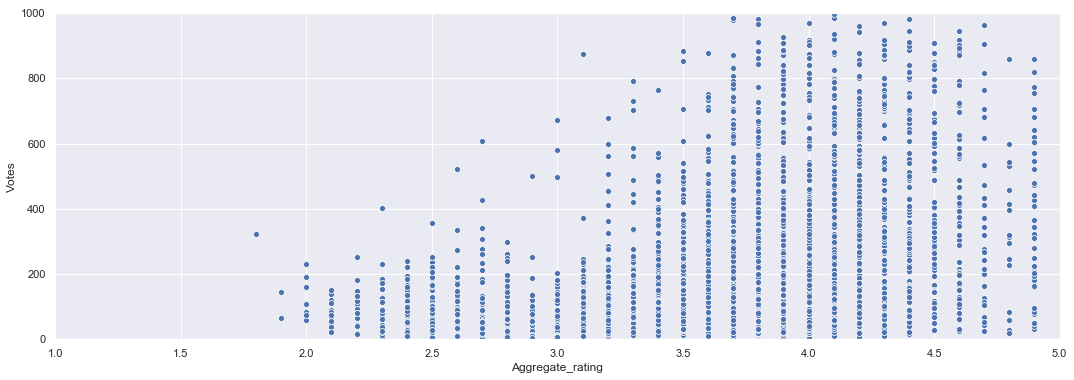

In [54]:
sns.set(rc={'figure.figsize':(18,6)})
sns.scatterplot(data=zomato,x='Aggregate_rating',y='Votes')
plt.ylim(0,1000)
plt.xlim(1,5)

Plotting the graph of Aggregate rating using seaborn

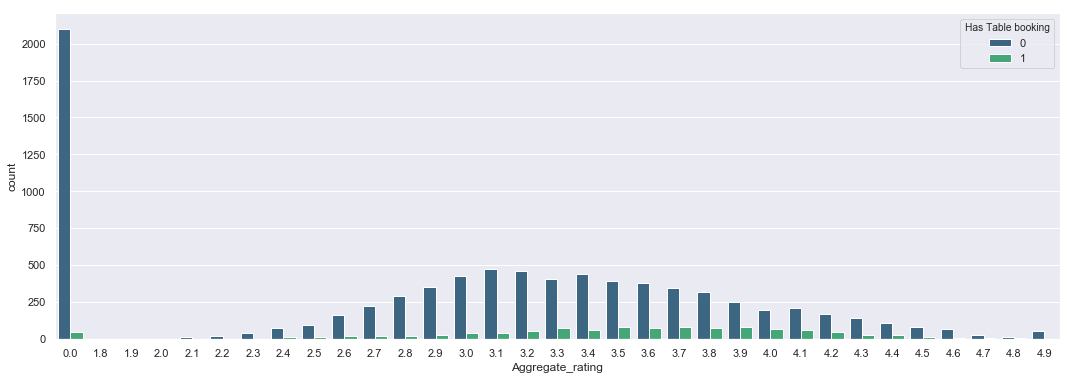

In [55]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(data=zomato,x='Aggregate_rating',hue='Has Table booking',palette='viridis')

Plotting the graph for Has Online Delivery with respect to Aggregate rating using seaborn

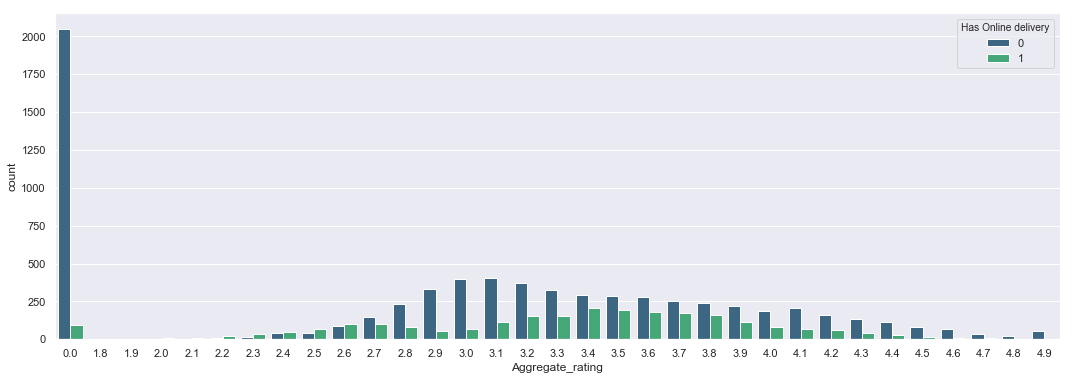

In [56]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(data=zomato,x='Aggregate_rating',hue='Has Online delivery',palette='viridis')

Plotting the graph for Rating text with respect to Aggregate rating using seaborn

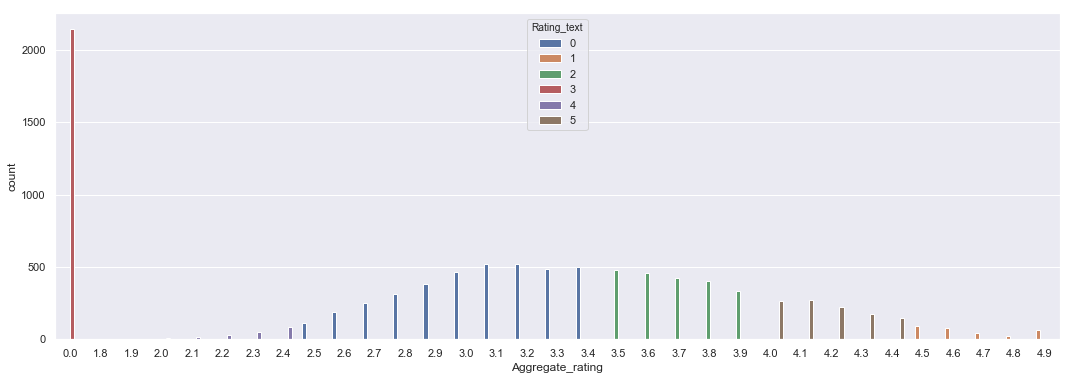

In [57]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(data=zomato,x='Aggregate_rating',hue='Rating_text')

Plotting the graph for Price range with respect to Aggregate rating using seaborn

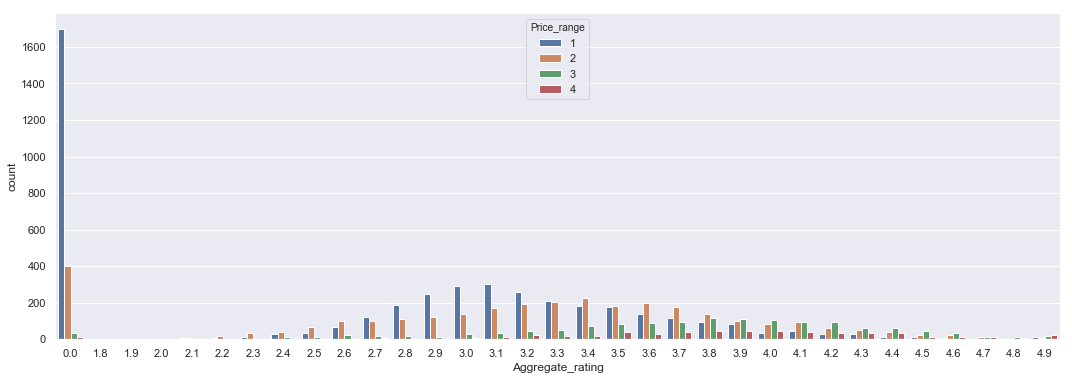

In [58]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(data=zomato,x='Aggregate_rating',hue='Price_range')

## Feature Selection

### Seaborn graph

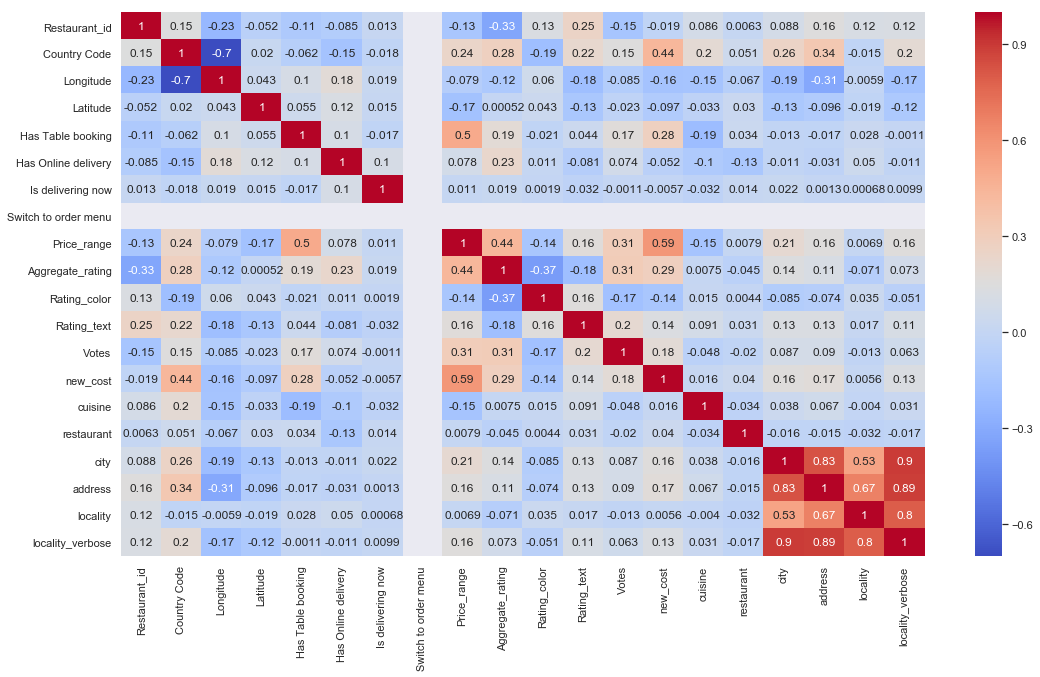

In [59]:
sns.set(rc={'figure.figsize':(18,10)})
sns.heatmap(data=zomato.corr(),cmap='coolwarm',annot=True)


Performing the pearson's correlation for choosing the best feature which is highly related to the target values [Aggregate rating]

In [61]:
corr=zomato.corr('pearson')
abs(corr['Aggregate_rating']).sort_values(ascending=False)

Aggregate_rating        1.000000
Price_range             0.437944
Rating_color            0.367054
Restaurant_id           0.326212
Votes                   0.313691
new_cost                0.289929
Country Code            0.282189
Has Online delivery     0.225699
Has Table booking       0.189998
Rating_text             0.182662
city                    0.144101
Longitude               0.116818
address                 0.113871
locality_verbose        0.073368
locality                0.070685
restaurant              0.045395
Is delivering now       0.019180
cuisine                 0.007479
Latitude                0.000516
Switch to order menu         NaN
Name: Aggregate_rating, dtype: float64

In [63]:
zomato.head()

,Restaurant_id,Country Code,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,new_cost,cuisine,restaurant,city,address,locality,locality_verbose
0,6317637,162,121.027535,14.565443,1,0,0,0,3,4.8,0,1,314,104.5,0.705835,-0.002499,0.936396,0.616048,0.305656,1.031834
1,6304287,162,121.014101,14.553708,1,0,0,0,3,4.5,0,1,591,114.0,1.787682,-0.898503,0.936396,0.390346,-0.218017,0.527627
2,6300002,162,121.056831,14.581404,1,0,0,0,4,4.4,1,5,270,380.0,0.014785,1.142312,1.503840,0.801826,-0.377289,0.995238
3,6318506,162,121.056475,14.585318,0,0,0,0,4,4.9,0,1,365,142.5,0.610066,-1.614263,1.503840,0.662638,0.068886,1.237404
4,6314302,162,121.057508,14.584450,1,0,0,0,4,4.8,0,1,229,142.5,0.877396,-0.619772,1.503840,0.679085,0.068886,1.237404


In [64]:
zomato.shape

(9551, 20)

Get dummies is used to add the features of seperate column values in the dataset

In [82]:
zomato = pd.get_dummies(zomato, columns=['Price_range','Rating_text','Has Table booking','Has Online delivery'])

## Linear Regression using sklearn

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Separing the features and the target with seperate dataframes

In [85]:
X = np.array(zomato.drop(['Aggregate_rating'], axis=1))
Y = np.array(zomato['Aggregate_rating'])

### Splitting the dataset
We are splitting the dataset for training and testing the datapoints in the ratio 3:2.So that we can train our model and test the datapoints on the same model.

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

Importing Linear Regression Sklearn model

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
regressor = LinearRegression()

Fitting the Linear model for trained dataset

In [90]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predicting the Linear Model for test datapoints

In [91]:
Y_pred=regressor.predict(X_test)

In [92]:
for i in zip(Y_pred,Y_test):
    print(i)

(4.109607296052049, 4.1)
(3.1067477397126133, 3.1)
(3.051044686470563, 3.4)
(3.0370688561141987, 3.0)
(-0.006647638430577807, 0.0)
(3.072361742369823, 3.2)
(-0.0444221880029545, 0.0)
(3.029173167113939, 3.3)
(3.0727690985626452, 3.4)
(4.139812293019679, 4.0)
(3.007752882527799, 2.6)
(3.0296198491642947, 3.1)
(3.690670833434327, 3.8)
(3.7626656761653994, 3.7)
(4.293355856503346, 4.1)
(3.091292099539448, 3.1)
(3.056253410017008, 3.0)
(0.03955793826148213, 0.0)
(3.650532777151067, 3.9)
(-0.00792958795339338, 0.0)
(3.081035094033906, 3.1)
(3.073490705562538, 2.8)
(3.653201339524114, 3.6)
(-0.015049362276267964, 0.0)
(3.0325665278567646, 2.8)
(3.698726055192794, 3.6)
(4.158025279214273, 4.0)
(3.656291423487758, 3.5)
(3.0103232567500036, 3.0)
(3.0368833857006616, 3.1)
(4.134131428066231, 4.1)
(3.6601103027443203, 3.6)
(3.0503575998047605, 3.1)
(0.013689199827868315, 0.0)
(3.7097077515709778, 3.8)
(3.0371663134263915, 2.6)
(3.0376976864622205, 3.0)
(3.01007494596696, 2.7)
(4.6621143078003735,

(3.0237880467741727, 3.2)
(0.03418355047830346, 0.0)
(3.047965164918666, 3.4)
(-0.0028917435848025974, 0.0)
(-0.026370667212218812, 0.0)
(4.6914404430844705, 4.5)
(0.0003125114576256749, 0.0)
(4.216347004301402, 4.1)
(0.03514108398064497, 0.0)
(3.0328482905850036, 2.6)
(0.018309509563704474, 0.0)
(3.041956747879612, 3.4)
(0.02414102906949811, 0.0)
(3.0493827991936886, 3.0)
(3.0498088473302136, 3.0)
(4.16743001066268, 4.3)
(4.209637358038553, 4.0)
(3.7594077037249223, 3.9)
(3.0920656713493377, 3.2)
(3.073726299093951, 3.3)
(3.086752158340525, 3.4)
(3.0490042461381153, 3.2)
(3.660696483036644, 3.5)
(4.714996749771828, 4.9)
(3.046019823662538, 2.6)
(0.0664775058388134, 0.0)
(3.6926417168672705, 3.6)
(3.0400121585858324, 3.4)
(-0.01899642966103965, 0.0)
(-0.013414224979221068, 0.0)
(0.0072738499072713125, 0.0)
(3.6907361810075363, 3.7)
(3.072507756479346, 3.0)
(3.045930158386141, 2.9)
(4.686594811698528, 4.7)
(-0.004616068532131479, 0.0)
(3.7151610074525285, 3.5)
(-0.03897151079571959, 0.0

(-0.03182870520619918, 0.0)
(3.734074726730182, 3.7)
(-0.011505436736653607, 0.0)
(3.0743967383903312, 3.0)
(2.333923643275991, 2.4)
(4.194609247555408, 4.1)
(3.6527881734546157, 3.5)
(3.675866640018901, 3.6)
(0.007991294969854401, 0.0)
(3.0864851760595258, 2.6)
(3.6857444024611894, 3.7)
(4.174767327173271, 4.0)
(3.0316075288981312, 2.7)
(3.692563983294587, 3.9)
(3.0636915101745417, 3.2)
(3.7191003093385264, 3.8)
(3.097008713616856, 3.2)
(4.1258684746964915, 4.1)
(3.7698875605365307, 3.6)
(3.0457955644134262, 2.5)
(3.0558377479942678, 3.4)
(3.6791404298648516, 3.5)
(3.01909807739917, 3.0)
(4.231365125556402, 4.4)
(3.1043485456782407, 3.1)
(0.023178059578504495, 0.0)
(3.044248309652797, 3.3)
(3.647828618190884, 3.6)
(3.702160177771446, 3.5)
(3.038768161982694, 2.9)
(3.0306161649782446, 2.7)
(3.707749200959171, 3.9)
(0.06364629849470393, 0.0)
(4.174675376924157, 4.1)
(4.199432643072135, 4.1)
(3.0539015755580143, 2.6)
(0.028567323853073923, 0.0)
(4.150838414510392, 4.0)
(3.655254724134575

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

#### Mean Squared Error 

In [94]:
mean_squared_error(Y_test,Y_pred)

0.03191557892722236

#### Root mean squared error

In [95]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

0.17864931829487166


Computing the r2_score for Linear Regression

In [96]:
r2_score(Y_test,Y_pred)

0.9861738024247685

In [100]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.13028919538947403
Mean Squared Error: 0.03191557892722236
Root Mean Squared Error: 0.17864931829487166
